# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [69]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

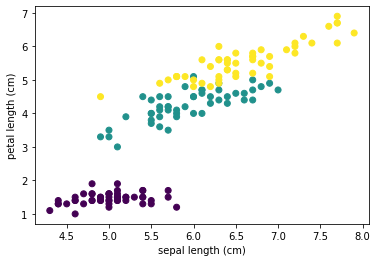

In [78]:
feat1 = 0
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

KNeighborsClassifier(n_neighbors=3)

The following defines three different linear models (Linear regression, logistic regression, linear support vector machine) that we will study in more detail in the following lectures. For now we need to know that for each of the models we first specify the desired model class, and then fit (or 'train', or 'learn') the model based on our labeled training data. The linear regression model requires the label information in a different format from the other two models, which is why we first construct the 'one hot encoding' representation. After the models have been fitted, they each define a linear decision boundary, and can classify unlabeled examples. 

In [79]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0
  
irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

irislogreg = LogisticRegression()
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

irislinsvc = SVC(kernel='linear')
irislinsvc.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


SVC(kernel='linear')

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or one of the linear models).


In [80]:
def plot_mesh(meshclasses, xx, yy):
    meshclasses = meshclasses.reshape(xx.shape)
    plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
    plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
    plt.xlabel(irisdata['feature_names'][feat1])
    plt.ylabel(irisdata['feature_names'][feat2])
    plt.show()

In [81]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

In [82]:
X_train, X_test ,Y_train, Y_test= train_test_split(irisdata.data, irisdata.target, test_size=0.30)

k = 1
KNN training accuracy 0.9904761904761905
KNN test accuracy 0.9777777777777777


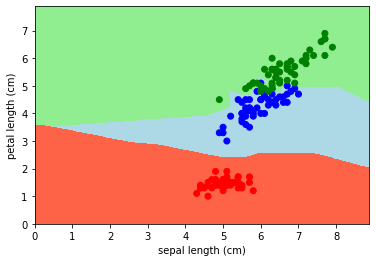

k = 2
KNN training accuracy 0.9238095238095239
KNN test accuracy 0.9333333333333333


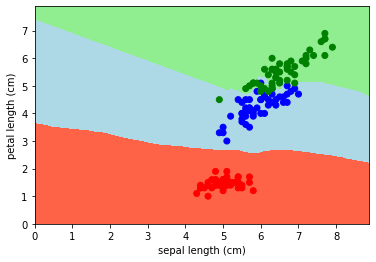

k = 4
KNN training accuracy 0.9428571428571428
KNN test accuracy 1.0


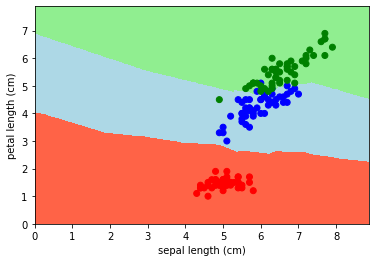

k = 6
KNN training accuracy 0.9428571428571428
KNN test accuracy 1.0


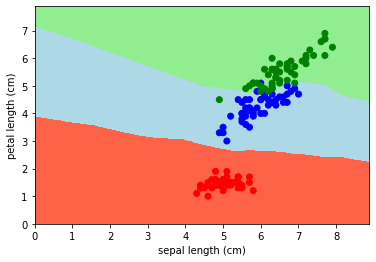

k = 8
KNN training accuracy 0.9428571428571428
KNN test accuracy 1.0


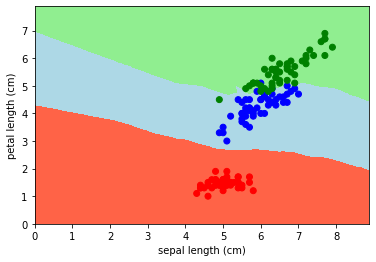

k = 10
KNN training accuracy 0.9428571428571428
KNN test accuracy 1.0


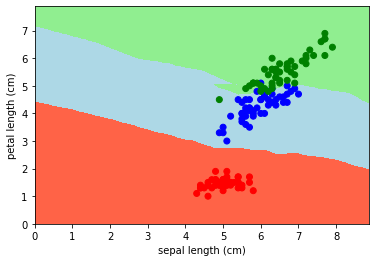

k = 12
KNN training accuracy 0.9428571428571428
KNN test accuracy 1.0


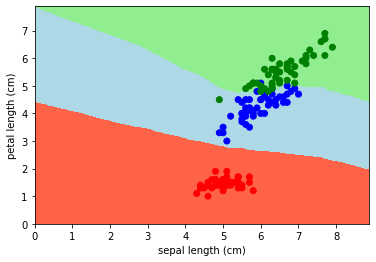

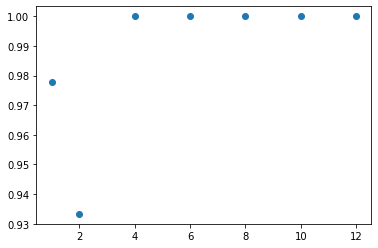

In [85]:
knn_graph = []

for i in range(1, 15, 2):
    k = i-1 if i > 1 else 1
    irisknn = KNeighborsClassifier(n_neighbors=k)
    irisknn.fit(X_train[:,[feat1,feat2]],Y_train)

    test_accuracy = irisknn.score(X_test[:,[feat1,feat2]],Y_test)
    train_accuracy = irisknn.score(X_train[:,[feat1,feat2]],Y_train)

    print(f"k = {k}")
    print("KNN training accuracy "+ str(train_accuracy))
    print("KNN test accuracy " + str(test_accuracy))

    y_train_preds_knn = irisknn.predict(X_train[:,[feat1,feat2]])
    accuracy_score(Y_train,y_train_preds_knn)

    Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
    meshclasses = Z

    knn_graph.append([k, test_accuracy])
    
    plot_mesh(meshclasses, xx, yy)

plt.scatter([x[0] for x in knn_graph], [x[1] for x in knn_graph])
plt.show()

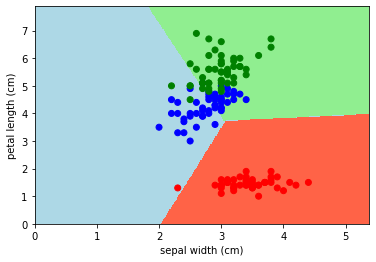

In [64]:
Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)

plot_mesh(meshclasses, xx, yy)

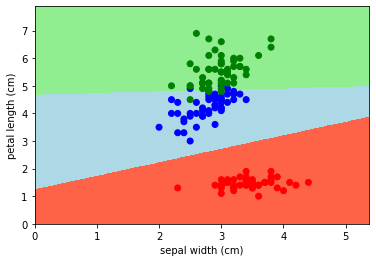

In [65]:
Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

plot_mesh(meshclasses, xx, yy)

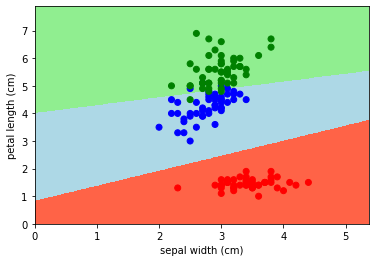

In [66]:
Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

plot_mesh(meshclasses, xx, yy)

**Exercise 1** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features (see explanations in the code). This does not require any extension of the code.

#### KNN | Linear Regression
![KNN](images/iris_knn.png)
![Linear Regression](images/iris_lin.png)
#### Logistic Regression | Support Vector Machines
![Log](images/iris_log.png)
![Linear Regression](images/iris_svc.png)

#### Text Description for Lin. reg. vs. KNN
- KNN we see that the decision boundaries are somewhat horziontal lines through the space, which splits the classes into different decision regions. The above scatter plot also shows the same horizontal tendencies for the 2 considered features, so it is a good representation.
- why do it get horizontal decision boundaries?, it is likely that it places center, where there are most of the same kind of points, and then will classify based on which points are closed, hence we get these more simpler horizontal boundaries, as data with feat1 and feat2 seems to be placing itself in horizontally distinct regions in 2D plot
- When KNN is low such as 1 we can see on some of the above plots, that there can be like small regions of a class inside other regions, because it only considers fewer neighbours, so it can fit more to training data, but this is most likely overfitting, and so can perform bad on test data
- Higher values for KNN seems better, as it can be more robust in its estimation, but when having very large datasets, it could be computationally expensive, but prediction can still be fast. But can have underfitting, because if there are some outliers, it can unneccessarily fit to those, and hence move the estimated means in to wrong directions as when considering the test set

- Lin. Reg. shows the three linear decision boundaries, which have no overlap in the decision regions, similar as from slide with max(y1,y2,y3), this will result in as we can see these intersecting hyperplanes, as each hyperplane only is fitted on the single class, hence when plotting when max(y1,y2,y3) changes they will intersect as we see here.
it seems not as good as KNN. It misclassifies a bunch of the blue points. So it will create a linear regression model for each class.

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

### KNN Training and Test Accuracy

In [103]:
# KNN method
# Train
irisknn = KNeighborsClassifier(n_neighbors=3)
irisknn.fit(X_train[:,[feat1,feat2]],Y_train)
# Test 
y_pred = irisknn.predict(X_test[:,[feat1,feat2]])
# Evaluate
print("KNN Train accuracy", accuracy_score(Y_train, irisknn.predict(X_train[:,[feat1,feat2]])))
print("KNN Test accuracy:", accuracy_score(Y_test, y_pred))
print("Classes: red, blue, green")
print("KNN confusion matrix on test set:\n", confusion_matrix(Y_test, y_pred))

KNN Train accuracy 0.9428571428571428
KNN Test accuracy: 0.9333333333333333
Classes: red, blue, green
KNN confusion matrix on test set:
 [[ 9  0  0]
 [ 0 19  1]
 [ 0  2 14]]


### KNN accuracy as a function of K

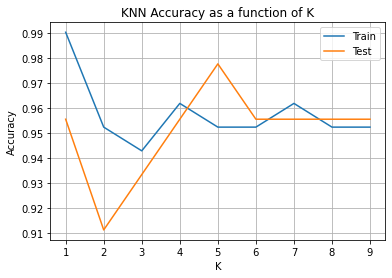

In [101]:
max_k = 10
train_acc = []
test_acc = []
for K in range(1, max_k):   
    irisknn = KNeighborsClassifier(n_neighbors=K)
    irisknn.fit(X_train[:,[feat1,feat2]],Y_train)
    y_pred = irisknn.predict(X_test[:,[feat1,feat2]])
    train_acc.append(accuracy_score(Y_train, irisknn.predict(X_train[:,[feat1,feat2]])))
    test_acc.append(accuracy_score(Y_test, y_pred))
    
# Plot the accuracy
plt.plot(range(1, max_k), train_acc, label='Train')
plt.plot(range(1, max_k), test_acc, label='Test')
plt.title("KNN Accuracy as a function of K")
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Linear Regression Training and Test Accuracy

In [104]:
irislinreg = LinearRegression()
onehotclasses_train = np.eye(3)[Y_train]
onehotclasses_test = np.eye(3)[Y_test]
# Train
irislinreg.fit(X_train[:,[feat1,feat2]], onehotclasses_train)
# Test
y_train_pred = irislinreg.predict(X_train[:,[feat1,feat2]])
y_test_pred = irislinreg.predict(X_test[:,[feat1,feat2]])

# Evaluate
print("Linear Regression Train accuracy", accuracy_score(np.argmax(onehotclasses_train, axis=1), np.argmax(y_train_pred, axis=1)))
print("Linear Regression Test accuracy:", accuracy_score(np.argmax(onehotclasses_test, axis=1), np.argmax(y_test_pred, axis=1)))
print("Linear Regression confusion matrix on test set:\n", confusion_matrix(np.argmax(onehotclasses_test, axis=1), np.argmax(y_test_pred, axis=1)))

Linear Regression Train accuracy 0.7904761904761904
Linear Regression Test accuracy: 0.6444444444444445
Linear Regression confusion matrix on test set:
 [[ 9  0  0]
 [ 2  5 13]
 [ 0  1 15]]


### Text for Exc.2 
- as reflected from the figures, the KNN has better decision boundaries than the linear regression for the iris dataset.
- as such KNN it has higher accuracy on the test data.
- We can see very clearly from the confusion matrix for linReg. on the test set it has some clear difficulties on class:1 (blue), where it classifies a significant portion as class:2 (green), we can scroll up and we can also see very clearly from the decision boundaries on the train set, why this is happening.
- so we see linReg. is not optimal for this kind of dataset
- Hence its accuracy is lower than KNN

**Exercise 3:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

In [118]:
#knn all features
features = [0,1,2,3]

irisknn = KNeighborsClassifier(n_neighbors=1)
irisknn.fit(X_train[:,features],Y_train)

y_pred = irisknn.predict(X_test[:])

test_accuracy = accuracy_score(Y_test, y_pred)
 
train_accuracy = accuracy_score(Y_train, irisknn.predict(X_train))

print(f"k = {1}")
print("KNN training accuracy "+ str(train_accuracy))
print("KNN test accuracy " + str(test_accuracy))

y_train_preds_knn = irisknn.predict(X_train[:,features])
accuracy_score(Y_train,y_train_preds_knn)

k = 1
KNN training accuracy 1.0
KNN test accuracy 0.9555555555555556


1.0

In [119]:
# linreg all features
features = [0,1,2,3]


irisknn = LinearRegression()
irisknn.fit(X_train,onehotclasses_train)
y_train_preds = irisknn.predict(X_train)
y_test_preds = irisknn.predict(X_test)

train_accuracy = accuracy_score(Y_train, np.argmax(y_train_preds, axis=1))
test_accuracy = accuracy_score(Y_test, np.argmax(y_test_preds,axis=1))

print("LinReg training accuracy "+ str(train_accuracy))
print("LinReg test accuracy " + str(test_accuracy))

LinReg training accuracy 0.8476190476190476
LinReg test accuracy 0.8222222222222222


### Text for Exc.3
- Adding all features had a slight improvement on the accuracy for both models on both the training and test set.